# The simple net that will recognize images from MNIST dataset

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../src/easyesn/')
import os
loc=os.getcwd() 

In [4]:
from mnist import MNIST #dataset of handwritten numbers 
mndata = MNIST(loc)
tr_images, tr_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [5]:
img_shape = (28, 28)
for i in range(len(test_images)):
    test_images[i] = np.array(test_images[i]) / 255
     
for i in range(len(tr_images)):
    tr_images[i] = np.array(tr_images[i]) / 255

In [29]:
class simple_cls:
    w = (2*np.random.rand(10, 784) - 1) / 10
    b = (2*np.random.rand(10) - 1) / 10
    def relu(self,x): #activation function
        return np.maximum(x, 0)

    def classify(self,img): #classification function
        result = list(range(10))
        for i in range(10):
            res_vect= self.w[i] * img
            res_vect = self.relu(np.sum(res_vect) + self.b[i])
            result[i] = res_vect

        return np.argmax(result)
    def train(self,tr_images,tr_labels): #train func
        for n in range(len(tr_images)):
            img = tr_images[n]
            cls = tr_labels[n]
            #forward propagation
            res = np.zeros(10, dtype=np.float32)
            for i in range(0,10):
                r = self.w[i] * img
                r = self.relu(np.sum(r) + self.b[i])
                res[i] = r

            res_cls = np.argmax(res)
            res = np.zeros(10, dtype=np.float32)
            res[res_cls] = 1.0
            #back propagation
            true_res = np.zeros(10, dtype=np.float32)
            true_res[cls] = 1.0

            error = res - true_res

            delta = error * ((res >= 0) * np.ones(10))
            for i in range(0,10):
                self.w[i] -= np.dot(img, delta[i])
                self.b[i] -= delta[i]
    def calc_err(self,test_images,test_labels): #the percentage of valid answers
        valid=0
        for i in range(len(test_images)):
            img = test_images[i]
            predicted = self.classify(img)
            true = test_labels[i]
            if predicted == true:
                valid = valid + 1
        return 1-(valid/len(test_images))



In [31]:
net=simple_cls()
net.train(tr_images,tr_labels)

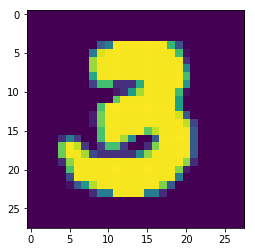

3

In [32]:
i=200
l=np.array(test_images[i])
l=l.reshape((28,28))
plt.imshow(l)
plt.show()
net.classify(test_images[i])

In [34]:
print("percentage of err is ",net.calc_err(tr_images,tr_labels))

percentage of err is  0.1414833333333333
